#自由は本当に人を幸せにするのか？
氏名：宇田一博　学籍番号：1254810116

#このテーマにした理由
私は大学生となり、今までの人生において比較的に自由な生活を送れるようになりました。今までとは違って、いろいろなことを自分の好きなようにできる！と大きく期待していました。
しかし、実際は何をしたいのかがわからなくなってしまったり、何をやるにしても責任が伴っていたりしていて、期待していたよりも平凡で変わらない日常を過ごしてしまっています。
このように、自由が必ずしも人を幸せにするものではないんじゃないかと思い、このテーマで研究を進めました。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# データ読み込み
df = pd.read_csv("world_happiness_report.csv")

df.head()


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


まずは自由（Freedom）と幸福度（Happiness）の関係を散布図にしてわかりやすくしていきます。

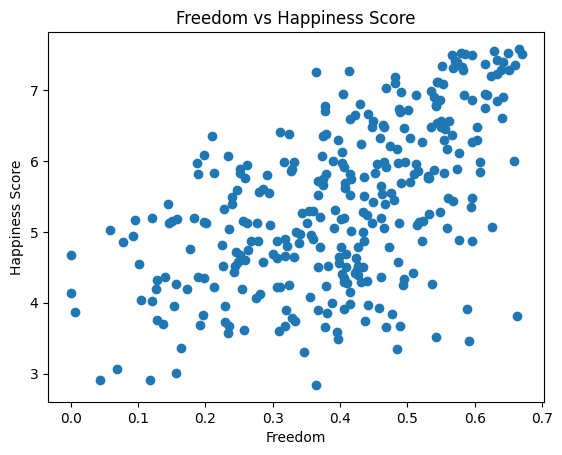

In [3]:
plt.figure()
plt.scatter(df["Freedom"], df["Happiness Score"])
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.title("Freedom vs Happiness Score")
plt.show()


この散布図では横軸が自由度、縦軸が幸福度を表しています。
結果を見ると確かに自由度が高いほど幸福度も高くなっているように見えますが全体的にばらつきも見られます。

次は相関関係を使って数値で関係を見ていきます。

In [4]:
corr = df["Freedom"].corr(df["Happiness Score"])
corr


np.float64(0.5564144422406027)

自由度と幸福度の相関関係は0.556となっていて
中程度の正の相関関係があることが分かりました。

このことから自由は幸福に少なからず影響を与えているものの、他の要因が幸福度に与えている影響の方がでかいのではないかと感じたので
次に他の要因を含めた比較をしていきます。

In [5]:
cols = [
    "Happiness Score",
    "Freedom",
    "Economy (GDP per Capita)",
    "Health (Life Expectancy)",
    "Family"
]

df[cols].corr()


,Happiness Score,Freedom,Economy (GDP per Capita),Health (Life Expectancy),Family
Happiness Score,1.000000,0.556414,0.779171,0.734491,0.693547
Freedom,0.556414,1.000000,0.331127,0.369799,0.425377
Economy (GDP per Capita),0.779171,0.331127,1.000000,0.789103,0.566283
Health (Life Expectancy),0.734491,0.369799,0.789103,1.000000,0.569937
Family,0.693547,0.425377,0.566283,0.569937,1.000000


数値だけではわかりにくいためヒートマップにしていきます。

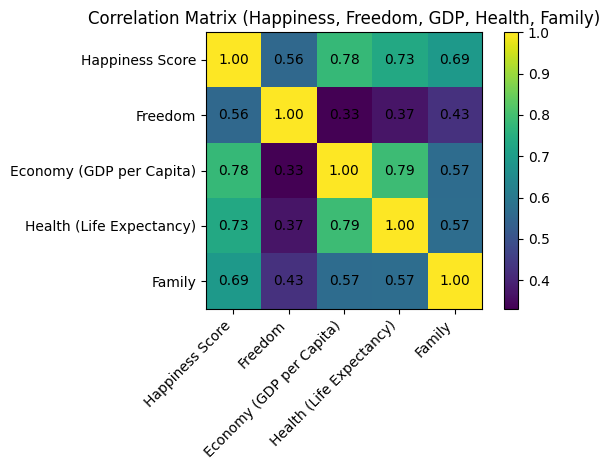

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 相関行列
corr = df[cols].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()

# 軸ラベル
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)

# 数値をマス目に表示
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center")

plt.title("Correlation Matrix (Happiness, Freedom, GDP, Health, Family)")
plt.tight_layout()
plt.show()


このヒートマップから自由度（Freedom）と幸福度（Happiness Score）の相関よりも他の三つの要素の幸福度との相関の方が強いことがわかりました。

In [11]:
cols_reg = [
    "Happiness Score",
    "Freedom",
    "Economy (GDP per Capita)",
    "Health (Life Expectancy)",
    "Family"
]

df_reg = df[cols_reg]


In [12]:
df_reg = df_reg.dropna()


In [13]:
import statsmodels.api as sm

X = df_reg[
    ["Freedom", "Economy (GDP per Capita)", "Health (Life Expectancy)", "Family"]
]
y = df_reg["Happiness Score"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     243.6
Date:                    水, 14 1 2026   Prob (F-statistic):           2.47e-94
Time:                        14:28:38   Log-Likelihood:                -264.29
No. Observations:                 315   AIC:                             538.6
Df Residuals:                     310   BIC:                             557.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#結論
私の考察とは異なり
分析の結果、自由度は幸福度と正の相関を持つことが確認されました。
しかしながら、GDP や健康などの要因を同時に考慮すると、
自由の影響は限定的であり、幸福度は複数要因の組み合わせによって決まると考えられます。

In [1]:
pip install geopandas matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ① 世界地図（Natural Earth）をURLから読み込む
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# ② 幸福度データ
df = pd.read_csv("world_happiness_report.csv")

# ③ 必要な列だけ
df_map = df[["Country", "Happiness Score", "Freedom"]].dropna()

# ④ 国名で結合
merged = world.merge(df_map, left_on="NAME", right_on="Country", how="left")


C:\Users\ukazu\AppData\Local\Temp\ipykernel_13624\960870047.py:24: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\ukazu\AppData\Local\Temp\ipykernel_13624\960870047.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


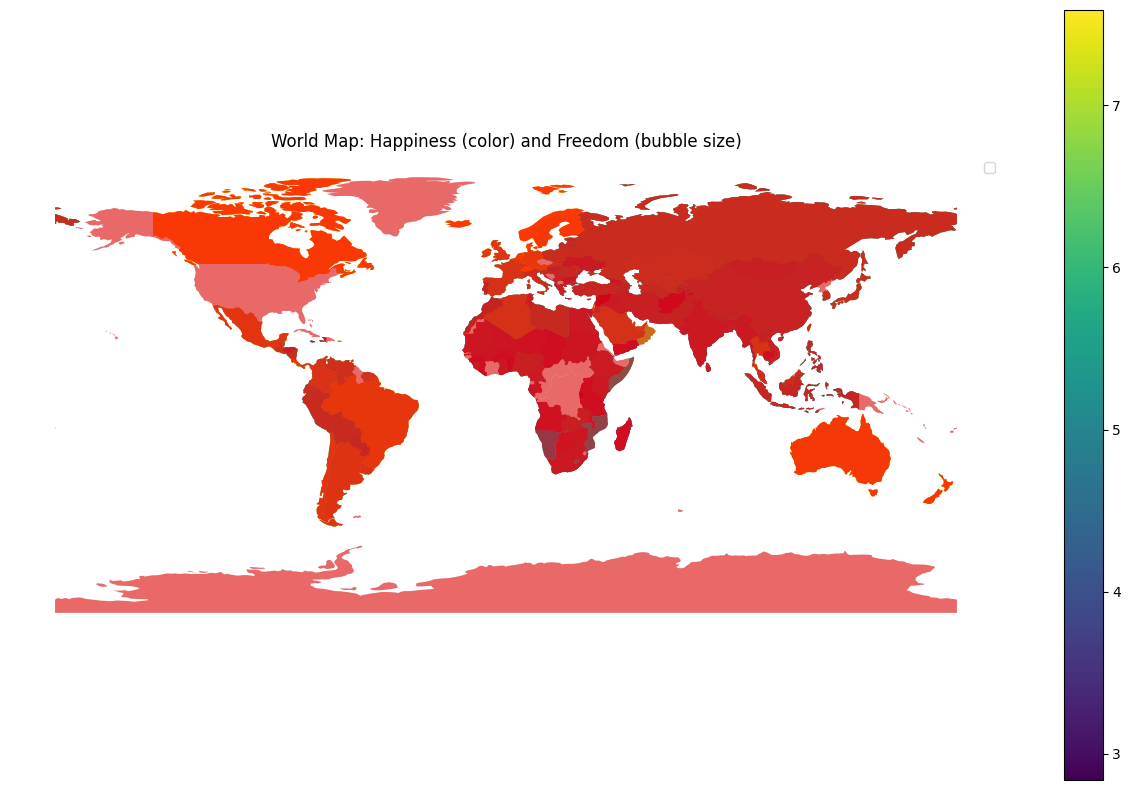

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# 幸福度（色）
merged.plot(
    column="Happiness Score",
    cmap="viridis",
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=ax
)

# 自由度（バブル）
merged.plot(
    ax=ax,
    markersize=merged["Freedom"] * 250,
    color="red",
    alpha=0.5,
    marker="o",
    label="Freedom"
)

ax.set_title("World Map: Happiness (color) and Freedom (bubble size)")
ax.axis("off")
ax.legend()

plt.show()


図Xは世界各国の幸福度と自由度の関係を地図上に可視化したものです。
色の濃淡は幸福度スコアを示し、円の大きさは自由度を表しています。
幸福度の高い国は概して自由度も高い傾向が見られますが、
地域によっては必ずしも一致しない国も存在します。